In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
N = 11
h = 1/(N-1)
x = linspace(0,1,N)

In [3]:
f = ones((N,))

In [4]:
A = zeros((N,N))
for i in range(1,N-1):
    A[i, i-1] = A[i, i+1] = -1
    A[i,i] = 2
A[0,0] = A[-1,-1] = 1
f[0] = f[-1] = 0

A = A/h**2

In [5]:
A, f

(array([[ 100.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.],
        [-100.,  200., -100.,    0.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.],
        [   0., -100.,  200., -100.,    0.,    0.,    0.,    0.,    0.,
            0.,    0.],
        [   0.,    0., -100.,  200., -100.,    0.,    0.,    0.,    0.,
            0.,    0.],
        [   0.,    0.,    0., -100.,  200., -100.,    0.,    0.,    0.,
            0.,    0.],
        [   0.,    0.,    0.,    0., -100.,  200., -100.,    0.,    0.,
            0.,    0.],
        [   0.,    0.,    0.,    0.,    0., -100.,  200., -100.,    0.,
            0.,    0.],
        [   0.,    0.,    0.,    0.,    0.,    0., -100.,  200., -100.,
            0.,    0.],
        [   0.,    0.,    0.,    0.,    0.,    0.,    0., -100.,  200.,
         -100.,    0.],
        [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0., -100.,
          200., -100.],
        [   0.,    0.,    0.,    0.,    

In [6]:
u = linalg.solve(A, f)

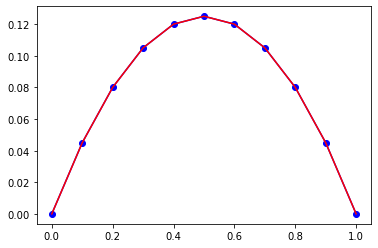

In [7]:
plot(x, u, 'o-b')
plot(x, 0.5*(x*(1-x)), 'r')

In [8]:
exact = 0.5*(x*(1-x))
error = max(abs(exact-u))

In [9]:
error

4.163336342344337e-17

In [10]:
exact = x*(1-x)*(x-.85)

In [11]:
import sympy as sym
t = sym.var('x')
exact_t = t*(1-t)*(t-.85)
fsymbol = sym.lambdify(t, -exact_t.diff(t, 2) )

x = linspace(0,1,N)
f = fsymbol(x)

In [12]:
x = linspace(0,1,N)
f = fsymbol(x)
f[0] = f[-1] = 0

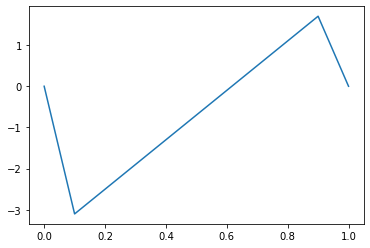

In [13]:
plot(x,f)

In [14]:
u = linalg.solve(A, f)

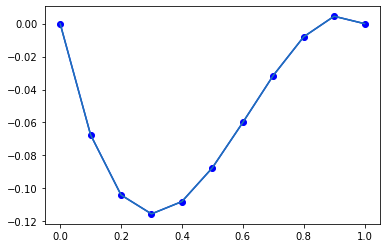

In [15]:
plot(x, u, 'ob-')
plot(x, exact)

In [16]:
max(abs(u - exact))

3.469446951953614e-17

In [17]:
x = sym.var('x')
h = sym.var('h')
g = sym.Function('g')

In [18]:
def cfd_II(x,h,g):
    return (g(x+h)- 2*g(x) + g(x-h))/h**2

def back_fd(x,h,g):
    return (g(x+h)- g(x))/h

def forward_fd(x,h,g):
    return (g(x)- g(x-h))/h

def central_fd(x,h,g):
    return (g(x+h)- g(x-h))/(2*h)

In [19]:
sym.series(back_fd(x, h, g), x=h, x0=0, n=2)

Subs(Derivative(g(_xi_1), _xi_1), _xi_1, x) + h*Subs(Derivative(g(_xi_1), (_xi_1, 2)), _xi_1, x)/2 + O(h**2)

In [20]:
sym.series(forward_fd(x, h, g), x=h, x0=0, n=2)

Subs(Derivative(g(_xi_1), _xi_1), _xi_1, x) - h*Subs(Derivative(g(_xi_1), (_xi_1, 2)), _xi_1, x)/2 + O(h**2)

In [21]:
sym.series(central_fd(x, h, g), x=h, x0=0, n=3)

Subs(Derivative(g(_xi_1), _xi_1), _xi_1, x) + h**2*Subs(Derivative(g(_xi_1), (_xi_1, 3)), _xi_1, x)/6 + O(h**3)

In [22]:
sym.series(cfd_II(x, h, g), x=h, x0=0, n=5)

Subs(Derivative(g(_xi_1), (_xi_1, 2)), _xi_1, x) + h**2*Subs(Derivative(g(_xi_1), (_xi_1, 4)), _xi_1, x)/12 + h**4*Subs(Derivative(g(_xi_1), (_xi_1, 6)), _xi_1, x)/360 + O(h**5)